In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# from stellargraph import StellarGraph
import networkx as nx
# import custom functions from utils.py
# from utils import *

In [3]:
'''
What I need to do:
Convert txt files to csv files
turn csv files into a graph and do some basic analysis and visualization to put into slides
Find a GNN that uses time series and is an anomaly detection model
'''

'\nWhat I need to do:\nConvert txt files to csv files\nturn csv files into a graph and do some basic analysis and visualization to put into slides\nFind a GNN that uses time series and is an anomaly detection model\n'

In [12]:
# determine if using laptop or desktop. For some reason relative path doesn't seem to work.
laptop = True
if laptop:
    # path = 'C:\\Users\\rober\\OneDrive\\Documents\\GitHub\\CAN-Graph\\datasets\\OTIDS\\Fuzzy_attack_dataset.txt'
    path = 'C:\\Users\\rober\\OneDrive\\Documents\\GitHub\\CAN-Graph\\datasets\\OTIDS\\DoS_attack_dataset.txt'
    #path = 'C:\\Users\\rober\\OneDrive\\Documents\\GitHub\\CAN-Graph\\datasets\\OTIDS\\Impersonation_attack_dataset.txt'
   # path = 'C:\\Users\\rober\\OneDrive\\Documents\\GitHub\\CAN-Graph\\datasets\\OTIDS\\Attack_free_dataset.txt'
else:
    path = 'C:\\Users\\User1\\Documents\\GitHub\\CAN-Graph\\datasets\\Fuzzy_attack_dataset.txt'
    # path = 'C:\\Users\\User1\\Documents\\GitHub\\CAN-Graph\\datasets\\DoS_attack_dataset.txt'
    # path = 'C:\\Users\\User1\\Documents\\GitHub\\CAN-Graph\\datasets\\Impersonation_attack_dataset.txt'
    # path = 'C:\\Users\\User1\\Documents\\GitHub\\CAN-Graph\\datasets\\Attack_free_dataset.txt'


In [5]:
def txt_to_dataframe(path):
    # this snippet of code is from https://github.com/mehrotrasan16/CS581-CAN-DO-Project/blob/main/code/Data_Preparation.ipynb
    dfdict2 = {}
    print(path)
    with open(path,'r') as file:
        for line in file.readlines():
            line = line.split()
            line.remove('Timestamp:')
            line.remove('ID:')
            line.remove('DLC:')
            # if len(line) > 4:
            #     line[4] = line[4:]
            #     line = line[:5]            
            dfdict2[float(line[0])] = line[1:]
            # print(line)

    #create df from dictionary
    df2 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dfdict2.items() ]))
    df2 = df2.T
    if "Fuzzy" in path: # Fuzzy dataset has an extra column
        df2 = df2.iloc[:,:-1]

    #set index and column names
    df2.columns = ['CAN ID','RTR','DLC','Data1','Data2','Data3','Data4','Data5','Data6','Data7','Data8'] 
    df2.index = df2.index.rename('Timestamp')


    # replace NaNs with 0s
    df2 = df2.fillna('0')
    #convert hex strings and objects to ints
    #change datatypes from hex to int
    df2['CAN ID'] = df2['CAN ID'].apply(lambda x: int(x, 16))
    df2['DLC'] = df2['DLC'].astype('int32')
    df2['RTR'] = df2['RTR'].astype('int32')
    b16 = lambda x: int(x,16)
    for col in ['Data1','Data2','Data3','Data4','Data5','Data6','Data7','Data8']:
        df2[col] = df2[col].apply(b16)
    
    return df2

In [13]:
df = txt_to_dataframe(path)

C:\Users\rober\OneDrive\Documents\GitHub\CAN-Graph\datasets\OTIDS\DoS_attack_dataset.txt


In [14]:
if laptop:
    df.to_csv('C:\\Users\\rober\\OneDrive\\Documents\\GitHub\\CAN-Graph\\datasets\\OTIDS\\DoS_attack_dataset.csv')

else:
    df.to_csv('C:\\Users\\User1\\Documents\\GitHub\\CAN-Graph\\datasets\\Attack_free_dataset.csv')

In [121]:
df = pd.read_csv('C:\\Users\\rober\\OneDrive\\Documents\\GitHub\\CAN-Graph\\datasets\\OTIDS\\Impersonation_attack_dataset.csv')
#df = pd.read_csv('C:\\Users\\rober\\OneDrive\\Documents\\GitHub\\CAN-Graph\\datasets\\OTIDS\\DoS_attack_dataset.csv')
# df = pd.read_csv('C:\\Users\\rober\\OneDrive\\Documents\\GitHub\\CAN-Graph\\datasets\\OTIDS\\Attack_free_dataset.csv')
df = pd.read_csv('C:\\Users\\rober\\OneDrive\\Documents\\GitHub\\CAN-Graph\\datasets\\OTIDS\\Fuzzy_attack_dataset.csv')

In [122]:
df

,Timestamp,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8
0,0.000000,544,0,8,41,197,38,85,106,103,2,93
1,0.000868,1201,0,8,94,81,207,183,76,153,170,151
2,0.001212,688,0,5,58,255,0,7,44,0,0,0
3,0.001452,357,0,8,0,8,128,2,0,0,12,134
4,0.001782,544,0,8,212,166,227,169,35,170,211,31
...,...,...,...,...,...,...,...,...,...,...,...,...
591985,347.330224,339,0,8,0,161,32,255,0,255,32,223
591986,347.330461,544,0,8,192,3,245,3,12,0,71,16
591987,347.330678,1440,0,8,166,32,82,109,167,238,124,226
591988,347.331050,1442,0,8,238,34,248,11,91,131,153,171


In [123]:

zero_rows = (df['CAN ID'] == 356).sum()
zero_rows


41590

In [124]:
df['CAN ID'].value_counts()

CAN ID
339     42704
356     41590
544     41538
497     36333
1201    36043
1200    35834
704     31645
1440    29891
1442    29368
790     19758
1087    16684
129     16627
399     16568
608     16556
128     16395
672     16151
880     16016
809     15886
1088    15831
1349    15293
357     14442
688     13620
1266     8469
898      8152
848      7968
1264     7857
272      5091
24       3051
1415     1663
1296     1641
160      1638
161      1560
1435     1537
1265     1535
1680     1411
1508     1330
1306      782
1303      761
80        731
288       698
1520      688
52        173
68        162
67        161
66        158
Name: count, dtype: int64

In [82]:
164 in df['CAN ID']

True

In [112]:
def label_messages(df):
    # DoS attack. If there are any messages with CAN ID 0, this dataset is a DoS attack
    if (df['CAN ID'] == 0).sum() != 0:
        df['label'] = df['CAN ID'].apply(lambda x: 1 if x == 0 else 0)
    
    # Impersonation attack. If there are any messages with CAN ID 356, this dataset is an Impersonation attack
    # attack free also has 356, so will need to find another way to differentiate
    elif (df['CAN ID'] == 356).sum() != 0:
        df['label'] = df['CAN ID'].apply(lambda x: 1 if x == 356 else 0)
    
    # Attack Free
    else:
        df['label'] = df['CAN ID'].apply(lambda x: 0)
    

    return df

        

In [113]:
df = label_messages(df)

In [125]:
df['label'] = df['CAN ID'].apply(lambda x: 0)

In [126]:
df

,Timestamp,CAN ID,RTR,DLC,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,label
0,0.000000,544,0,8,41,197,38,85,106,103,2,93,0
1,0.000868,1201,0,8,94,81,207,183,76,153,170,151,0
2,0.001212,688,0,5,58,255,0,7,44,0,0,0,0
3,0.001452,357,0,8,0,8,128,2,0,0,12,134,0
4,0.001782,544,0,8,212,166,227,169,35,170,211,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591985,347.330224,339,0,8,0,161,32,255,0,255,32,223,0
591986,347.330461,544,0,8,192,3,245,3,12,0,71,16,0
591987,347.330678,1440,0,8,166,32,82,109,167,238,124,226,0
591988,347.331050,1442,0,8,238,34,248,11,91,131,153,171,0


In [127]:
df['Node'] = df['CAN ID']
df['Edge'] = df['CAN ID'].shift(-1)


In [128]:
graph = df[['CAN ID', 'Node', 'Edge', 'label']]
graph = graph[:-1] # omit last row as it doesn't have an edge (or just make it a blank connection)
# graph of the last 200 messages
graph_200 = graph[-200:] # create window size
# graph_200 = graph[:-200] # create window size

In [129]:
graph_200

,CAN ID,Node,Edge,label
591789,898,898,704.0,0
591790,704,704,339.0,0
591791,339,339,339.0,0
591792,339,339,544.0,0
591793,544,544,356.0,0
...,...,...,...,...
591984,704,704,339.0,0
591985,339,339,544.0,0
591986,544,544,1440.0,0
591987,1440,1440,1442.0,0


In [130]:
# maybe I could make weights based on the {node, edge} count in the window size

G =  nx.DiGraph()
for index, element in graph_200.iterrows():
    G.add_edge(element['Node'], element['Edge'])


In [21]:
from collections import Counter
c = Counter(G.edges())  # Contains frequencies of each directed edge.

In [131]:
# Create a color map
df= graph_200
unique_labels = df['label'].unique()
color_map = {label: plt.cm.get_cmap('Set1')(i/len(unique_labels)) for i, label in enumerate(unique_labels)}
# Create a dictionary mapping nodes to colors
node_colors = df.set_index('Node')['label'].map(color_map).to_dict()

C:\Users\rober\AppData\Local\Temp\ipykernel_33052\1834303822.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = {label: plt.cm.get_cmap('Set1')(i/len(unique_labels)) for i, label in enumerate(unique_labels)}


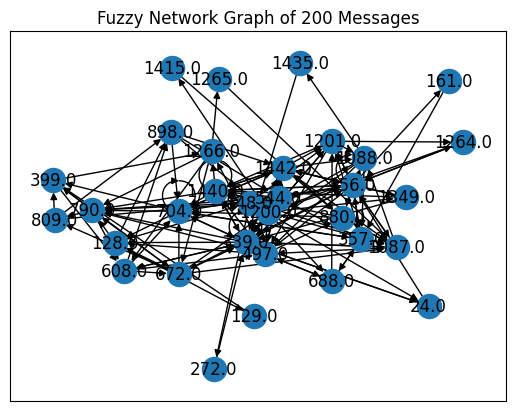

In [132]:
layouts = {'spring' : nx.spring_layout(G, k=1),
           'spiral': nx.spiral_layout(G),
           'spectral': nx.spectral_layout(G),
           'random': nx.random_layout(G),
           'circle': nx.circular_layout(G),
           }

# node_color= [node_colors[node] for node in G.nodes()],
nx.draw_networkx(G, pos=layouts['spring'], with_labels = True)
plt.title("Fuzzy Network Graph of 200 Messages")

plt.show()

In [30]:
# The eccentricity of a node v is the maximum distance from v to all other nodes in G.
ecc_dict = nx.eccentricity(G)

In [34]:
ecc_dict.values()

dict_values([10, 9, 9, 11, 10, 9, 10, 9, 10, 9, 8, 8, 7, 11, 10, 10, 10, 11, 10, 10, 9, 10, 11, 10, 9, 8, 13, 12, 11, 10, 9, 9, 9, 10, 10])

In [35]:
'''    
Graph properties from paper:
number of edges/ length - completed
diameter - longest path of graph
density for difected graph = edges / nodes * (nodes - 1)  
radius - shortest path of graph
recirocity
assortativity coefficient
average clustering coefficient
--------------------------------
additonal features:
neighbors
Hamming distance
Shannon entropy
'''
num_nodes = graph_200['Node'].nunique()
num_edges = graph_200[['Node', 'Edge']].value_counts().reset_index(name='count').shape[0] # unique {node, edge} pairing
diameter = nx.diameter(G)
radius = nx.radius(G)
reciprocity = nx.reciprocity(G)
dac = nx.degree_assortativity_coefficient(G)
avg_clustering = nx.average_clustering(G)
density = nx.density(G)
print('Number of Nodes: ', num_nodes)
print('Number of Edges/ Length: ', num_edges)
print('Radius of Graph: ', radius)
print('Diameter of Graph: ', diameter)
print('Reciprocity of Graph: ', reciprocity)
print('Assortativity coefficient of Graph: ', dac)
print('Average Clustering coefficient of Graph: ', avg_clustering)
print('Density of Graph: ', density)

Number of Nodes:  35
Number of Edges/ Length:  74
Radius of Graph:  7
Diameter of Graph:  13
Reciprocity of Graph:  0.2702702702702703
Assortativity coefficient of Graph:  -0.1383328783308315
Average Clustering coefficient of Graph:  0.24121461595297872
Density of Graph:  0.06218487394957983


In [ ]:
'''
ID | timestamp | payload (8 cols) | 

'''

In [36]:
nx.degree(G) # num edges adjacent to node

DiDegreeView({'18FEBF0B': 6, '08FE6E0B': 14, '0CF00400': 20, '0CF00300': 7, '18F00131': 4, '18FEF100': 6, '18FEF131': 5, '18F0000F': 6, '18FEF031': 6, '18FEF200': 6, '18FEF231': 7, '0CF00331': 8, '18FEE000': 6, '18EAFF31': 2, '18FEED00': 2, '18F0010B': 2, '18FECA31': 2, '18FEDF00': 4, '18FDA155': 2, '18FE5600': 2, '18FEEE00': 2, '18FEF600': 2, '0CFEDD00': 2, '18FEEF00': 2, '18FEF500': 2, '18FEC100': 2, '18FEBD00': 2, '18FEE400': 2, '18FEF700': 2, '18FD7C00': 2, '18FEFF00': 2, '18EA3100': 2, '1CECFF0F': 2, '1CEBFF0F': 3, '18FEE631': 2})